## Import Libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



## Importing data

In [2]:
data=pd.read_csv("C:\\Users\\hp\\Downloads\\Breast Cancer Prediction.csv")

## Basic Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


## Data Cleaning

## Empty cells

In [4]:
data.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

### Check Duplicates

In [5]:
print('Number of duplicated rows: ' , len(data[data.duplicated()]))

Number of duplicated rows:  8


## Plotting Boxplot

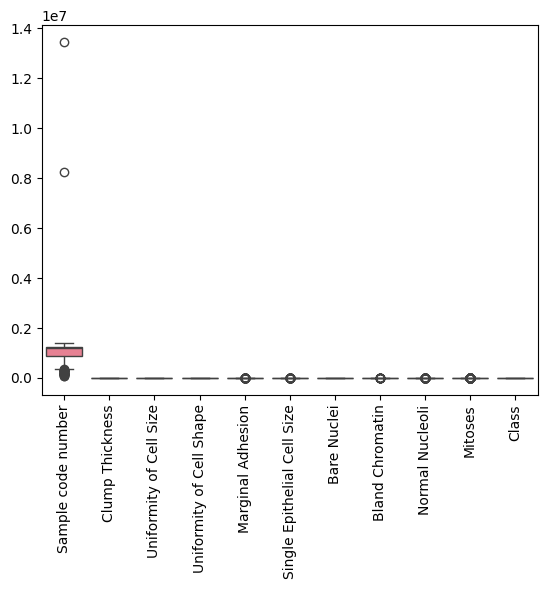

In [6]:
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

## Encoding Categorial Data

In [7]:
categ_col = data.select_dtypes(include=['object']).columns

# Initialize encoders
label_encoder = LabelEncoder()

# Encode each categorical column using Label Encoding for simplicity
encoded_data = data.copy()
for i in categ_col:
    encoded_data[i] = label_encoder.fit_transform(data[i])

# Display the first 5 rows of the encoded dataset
print(encoded_data)

     Sample code number  Clump Thickness  Uniformity of Cell Size  \
0               1000025                5                        1   
1               1002945                5                        4   
2               1015425                3                        1   
3               1016277                6                        8   
4               1017023                4                        1   
..                  ...              ...                      ...   
678              776715                3                        1   
679              841769                2                        1   
680              888820                5                       10   
681              897471                4                        8   
682              897471                4                        8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           1                  1                            2   
1        

## Extract Dependent and Independent Variables

In [8]:
X = encoded_data.iloc[:,1:10]   #Independent variable
y = encoded_data['Class']     #dependent variable

## ## Statistical Analysis
### (Correlation,Describe) 

In [9]:
print(data.describe())

       Sample code number  Clump Thickness  Uniformity of Cell Size  \
count        6.830000e+02       683.000000               683.000000   
mean         1.076720e+06         4.442167                 3.150805   
std          6.206440e+05         2.820761                 3.065145   
min          6.337500e+04         1.000000                 1.000000   
25%          8.776170e+05         2.000000                 1.000000   
50%          1.171795e+06         4.000000                 1.000000   
75%          1.238705e+06         6.000000                 5.000000   
max          1.345435e+07        10.000000                10.000000   

       Uniformity of Cell Shape  Marginal Adhesion  \
count                683.000000         683.000000   
mean                   3.215227           2.830161   
std                    2.988581           2.864562   
min                    1.000000           1.000000   
25%                    1.000000           1.000000   
50%                    1.000000     

                             Sample code number  Clump Thickness  \
Sample code number                        1.000           -0.056   
Clump Thickness                          -0.056            1.000   
Uniformity of Cell Size                  -0.041            0.642   
Uniformity of Cell Shape                 -0.042            0.653   
Marginal Adhesion                        -0.070            0.488   
Single Epithelial Cell Size              -0.049            0.524   
Bare Nuclei                              -0.099            0.593   
Bland Chromatin                          -0.062            0.554   
Normal Nucleoli                          -0.051            0.534   
Mitoses                                  -0.038            0.351   
Class                                    -0.085            0.715   

                             Uniformity of Cell Size  \
Sample code number                            -0.041   
Clump Thickness                                0.642   
Uniformity of C

<Axes: >

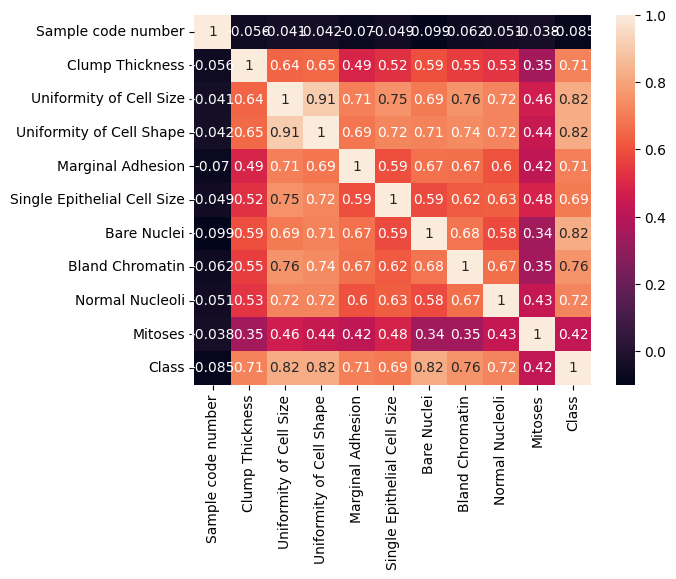

In [10]:
correlation=encoded_data.corr(numeric_only=True)
print(np.around(correlation,decimals=3))
sns.heatmap(correlation,annot=True)

## Split Train and Test Data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build Model

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Fitting the Logistic Regression model to the training set
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Comparing the actual output values for X_test with the predicted values
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(data)
print(data)

     Actual  Predicted
292       4          4
145       4          4
211       2          2
118       2          2
302       2          2
..      ...        ...
110       4          4
82        4          4
51        4          4
210       2          2
548       2          2

[137 rows x 2 columns]
     Actual  Predicted
292       4          4
145       4          4
211       2          2
118       2          2
302       2          2
..      ...        ...
110       4          4
82        4          4
51        4          4
210       2          2
548       2          2

[137 rows x 2 columns]


In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predicting the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score is ", accuracy * 100, "%")

# Optionally, include detailed performance metrics:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy score is  95.62043795620438 %

Confusion Matrix:
[[78  1]
 [ 5 53]]

Classification Report:
              precision    recall  f1-score   support

           2       0.94      0.99      0.96        79
           4       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137

